## **Short Summary of Results for Assignment2**

# **Cross Validation**

1. Here, I applied 5-fold, 3-fold and 10-fold cross-validation. Here I checked which K-fold cross validation among those three give the lowest mean squared error or has the best model performance. We observed that 5-fold CV gives the least mse 0.117673 which in turn gives the best model performance.

# **Bootstrap**

1. Here we ran bootstrap over-sampling to balance the previously imbalanced dataset. And model sensitivity (Sensitivity is calculated as the number of correct positive predictions divided by the total number of positives) has increased dramatically from 0.20% to 13% approximately than before after applying bootstrap with the cost of accuracy, here model accuracy is 63%. Though by this our accuracy dropped to 63% but our true postive to false negative ratio has much improved which is now 496:298, before which  was 1:108. 

# **Short Summary of Results for Assignment01**

# **Cross Validation**

1. First we got our training data for the price of diamond. Then I applied k-fold cross validation on that. Here, I applied 5-fold, 3-fold and 10-fold cross-validation. Here, I applied 5-fold, 3-fold and 10-fold cross-validation. Here I checked which K-fold cross validation among those three give the lowest mean squared error or has the best model performance. We observed that 3-fold CV gives the most mse 119821.59211327613 which in turn gives the best model performance.

# **Bootstrap**

1. Here we ran bootstrap sampling to the dataframe. I made a sample of the training dataset which has 3 times the size of the original dataset and which contains randomy distributed rows. Also, I made a sample of the training dataset which has 10 times the size of the original dataset which contains randomy distributed rows. After training the bootstrapped dataset and testing it on the test data which is Professor's requirement of diamond. And we got predicted value of 2874.73374529 for the 3 times sampling and 2815.94944113 for the 10 times sampling. So we observed as the sample size increased the diamond price decreased.

# **From Assignment 02**

**Here, I am importing the bank dataset file from assignment02 to make our predictor dataframe which will contain the predictor variables and response variable as well.**

In [ ]:

import pandas as pd
df = pd.read_csv ('bank.csv', sep=';')
df['y_new'] = pd.factorize(df.y)[0]

df['y_new'] = df.y_new.astype(float)
# Making the predictor dataframe by dropping other variables, I did not consider contact, day, month, poutcome as they did not seem important from the get go. 
# Also the problem states to not take duration as predictor as it states- "this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model"
# dropping rows for unknown values in education column
df_predict = df.drop(df.index[df['education'] == 'unknown'])
print(df_predict)



df_predict1=df_predict.drop(columns=['contact', 'day', 'month', 'duration', 'pdays', 'default', 'balance', 'pdays','age','job','campaign', 'poutcome', 'y', 'y_new'])

# putting dummy variables in categorical columns
education_dummies = pd.get_dummies(df_predict1.education, prefix="education")
df_with_dummies = pd.concat([df_predict1,education_dummies],axis='columns')
df_with_dummies.drop('education',axis='columns',inplace=True)
marital_dummies = pd.get_dummies(df_with_dummies.marital, prefix="marital")
df_with_dummies1 = pd.concat([df_with_dummies,marital_dummies],axis='columns')
df_with_dummies1.drop('marital',axis='columns',inplace=True)
housing_dummies = pd.get_dummies(df_with_dummies1.housing, prefix="housing")
df_with_dummies2 = pd.concat([df_with_dummies1,housing_dummies],axis='columns')
df_with_dummies2.drop('housing',axis='columns',inplace=True)
loan_dummies = pd.get_dummies(df_with_dummies2.loan, prefix="loan")
df_with_dummies3 = pd.concat([df_with_dummies2,loan_dummies],axis='columns')
df_with_dummies3.drop('loan',axis='columns',inplace=True)
df_with_dummies3 = df_with_dummies3.astype(float)
df_with_dummies3.dtypes

      age            job  marital  education  ... previous  poutcome   y y_new
0      30     unemployed  married    primary  ...        0   unknown  no   0.0
1      33       services  married  secondary  ...        4   failure  no   0.0
2      35     management   single   tertiary  ...        1   failure  no   0.0
3      30     management  married   tertiary  ...        0   unknown  no   0.0
4      59    blue-collar  married  secondary  ...        0   unknown  no   0.0
...   ...            ...      ...        ...  ...      ...       ...  ..   ...
4516   33       services  married  secondary  ...        0   unknown  no   0.0
4517   57  self-employed  married   tertiary  ...        0   unknown  no   0.0
4518   57     technician  married  secondary  ...        0   unknown  no   0.0
4519   28    blue-collar  married  secondary  ...        3     other  no   0.0
4520   44   entrepreneur   single   tertiary  ...        7     other  no   0.0

[4334 rows x 18 columns]


previous               float64
education_primary      float64
education_secondary    float64
education_tertiary     float64
marital_divorced       float64
marital_married        float64
marital_single         float64
housing_no             float64
housing_yes            float64
loan_no                float64
loan_yes               float64
dtype: object

# **Cross Validation**
Before, I worked on using 80% of our data for training and 20% for testing in logistic regression model. Cross validation makes us run our single model on various training/validation combinations and gives us a lot more confidence in our final metrics. Here, I applied 5-fold, 3-fold and 10-fold cross-validation. Each time we run the model, a different 80% of the data will be used for training, and a different 20% will be used for validation. And we can do this in such a manner that all of the data will be used in only one of the validation sets. This ensures that every point is used for validation exactly one time.  


In [ ]:
X = df_with_dummies3
X

,previous,education_primary,education_secondary,education_tertiary,marital_divorced,marital_married,marital_single,housing_no,housing_yes,loan_no,loan_yes
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,4.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4329,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4330,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4331,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4332,3.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
y1 = df_predict.y_new
y1

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
4329    0.0
4330    0.0
4331    0.0
4332    0.0
4333    0.0
Name: y_new, Length: 4334, dtype: float64

**Applying k-fold cross validation on my logistic regression model**


In [ ]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import sklearn.model_selection
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y1,train_size=0.8)

In [ ]:
import sklearn.linear_model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
model.score(X_test,y_test)

0.8858131487889274

# cross_val_score function
Scikit-learn's cross_val_score() method requires four parameters. First, we have the estimator or the specific model that we want to use, here, I used logistic regression. Next, we use X to specify the complete training dataset and y to specify the response values. Lastly, the parameter cv allows us to specify the number of cross-validation splits (or folds). Here, I applied 5-fold, 3-fold and 10-fold cross-validation. By default, cross_val_score() will use a default scoring function for whichever model have been specified. For most regression models, it will return the R-squared value.

In [ ]:
from sklearn.model_selection import cross_val_score
# Load the mean squared error method
# Load the function for creating a scorer
from sklearn.metrics import mean_squared_error, make_scorer

**Logistic regression model performance using cross_val_score**

In [ ]:
l_scores=cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), X,y1,cv=5, scoring=make_scorer(mean_squared_error))
# print(l_scores)
# np.average(l_scores)
# Print the mean error
print(l_scores.mean())

0.11767396267024673


Now I have a baseline score to build on. If I decide to build additional models or try new techniques, I should try to get an error lower than 0.11767396267024673. Lower errors indicate that my term deposit predictions are improving.

In [ ]:
l_scores=cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), X,y1,cv=3, scoring=make_scorer(mean_squared_error))
# print(l_scores)
# np.average(l_scores)
# Print the mean error
print(l_scores.mean())

0.11767453600309279


5-fold CV gave lower errors than 3-fold

In [ ]:
l_scores=cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), X,y1,cv=10, scoring=make_scorer(mean_squared_error))

# Print the mean error
print(l_scores.mean())

0.11790476899990424


5-fold CV gave lower errors than 10-fold

## **Bootstraping**

As we observed in the assignment02 that the dataset is imbalanced with a heavy bias towards 'no' in the response variable. Using Bootstrap over sampling method we can make the imbalanced dataset balanced


**First we are creating our training and tset dataframe all over again**

In [ ]:
import pandas as pd
df = pd.read_csv ('bank.csv', sep=';')
df['y_new'] = pd.factorize(df.y)[0]

df['y_new'] = df.y_new.astype(float)
# Making the predictor dataframe by dropping other variables, I did not consider contact, day, month, poutcome as they did not seem important from the get go. 
# Also the problem states to not take duration as predictor as it states- "this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model"
# dropping rows for unknown values in education column
df_predict = df.drop(df.index[df['education'] == 'unknown'])
print(df_predict)



df_predict1=df_predict.drop(columns=['contact', 'day', 'month', 'duration', 'pdays', 'default', 'balance', 'pdays','age','job','campaign', 'poutcome', 'y', 'y_new'])

# putting dummy variables in categorical columns
education_dummies = pd.get_dummies(df_predict1.education, prefix="education")
df_with_dummies = pd.concat([df_predict1,education_dummies],axis='columns')
df_with_dummies.drop('education',axis='columns',inplace=True)
marital_dummies = pd.get_dummies(df_with_dummies.marital, prefix="marital")
df_with_dummies1 = pd.concat([df_with_dummies,marital_dummies],axis='columns')
df_with_dummies1.drop('marital',axis='columns',inplace=True)
housing_dummies = pd.get_dummies(df_with_dummies1.housing, prefix="housing")
df_with_dummies2 = pd.concat([df_with_dummies1,housing_dummies],axis='columns')
df_with_dummies2.drop('housing',axis='columns',inplace=True)
loan_dummies = pd.get_dummies(df_with_dummies2.loan, prefix="loan")
df_with_dummies3 = pd.concat([df_with_dummies2,loan_dummies],axis='columns')
df_with_dummies3.drop('loan',axis='columns',inplace=True)
df_with_dummies3 = df_with_dummies3.astype(float)
df_with_dummies3.dtypes

      age            job  marital  education  ... previous  poutcome   y y_new
0      30     unemployed  married    primary  ...        0   unknown  no   0.0
1      33       services  married  secondary  ...        4   failure  no   0.0
2      35     management   single   tertiary  ...        1   failure  no   0.0
3      30     management  married   tertiary  ...        0   unknown  no   0.0
4      59    blue-collar  married  secondary  ...        0   unknown  no   0.0
...   ...            ...      ...        ...  ...      ...       ...  ..   ...
4516   33       services  married  secondary  ...        0   unknown  no   0.0
4517   57  self-employed  married   tertiary  ...        0   unknown  no   0.0
4518   57     technician  married  secondary  ...        0   unknown  no   0.0
4519   28    blue-collar  married  secondary  ...        3     other  no   0.0
4520   44   entrepreneur   single   tertiary  ...        7     other  no   0.0

[4334 rows x 18 columns]


previous               float64
education_primary      float64
education_secondary    float64
education_tertiary     float64
marital_divorced       float64
marital_married        float64
marital_single         float64
housing_no             float64
housing_yes            float64
loan_no                float64
loan_yes               float64
dtype: object

In [ ]:
X = df_with_dummies3
X

,age,previous,education_primary,education_secondary,education_tertiary,marital_divorced,marital_married,marital_single,housing_no,housing_yes,loan_no,loan_yes
0,30.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,33.0,4.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,35.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,30.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,59.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4329,33.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4330,57.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4331,57.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4332,28.0,3.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
y1 = df_predict.y_new
y1

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
4329    0.0
4330    0.0
4331    0.0
4332    0.0
4333    0.0
Name: y_new, Length: 4334, dtype: float64

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)

X_resampled, y_resampled = ros.fit_resample(X, y1)


In [ ]:
X_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7664 entries, 0 to 7663
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  7664 non-null   float64
 1   previous             7664 non-null   float64
 2   education_primary    7664 non-null   float64
 3   education_secondary  7664 non-null   float64
 4   education_tertiary   7664 non-null   float64
 5   marital_divorced     7664 non-null   float64
 6   marital_married      7664 non-null   float64
 7   marital_single       7664 non-null   float64
 8   housing_no           7664 non-null   float64
 9   housing_yes          7664 non-null   float64
 10  loan_no              7664 non-null   float64
 11  loan_yes             7664 non-null   float64
dtypes: float64(12)
memory usage: 718.6 KB


In [ ]:
y_resampled.describe

<bound method NDFrame.describe of 0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
7659    1.0
7660    1.0
7661    1.0
7662    1.0
7663    1.0
Name: y_new, Length: 7664, dtype: float64>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


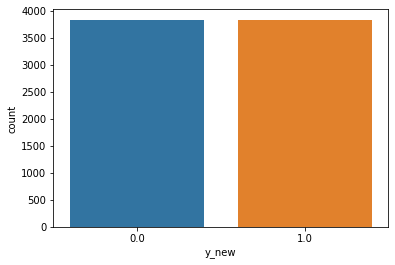

In [ ]:
import seaborn as sns
sns.countplot(y_resampled)

In [ ]:
import sklearn.model_selection
from sklearn.model_selection import train_test_split
X_resampled_train, X_resampled_test, y_resampled_train, y_resampled_test = train_test_split(X_resampled,y_resampled,train_size=0.8)

In [ ]:
import sklearn.linear_model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
model.fit(X_resampled_train, y_resampled_train)

LogisticRegression()

In [ ]:
model.predict(X_resampled_test)

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
y_resampled_predicted = model.predict(X_resampled_test)

In [ ]:
model.score(X_resampled_test,y_resampled_test)

0.6366601435094585

## **Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
cm_bootstrap = confusion_matrix(y_resampled_test, y_resampled_predicted)
cm_bootstrap

array([[480, 259],
       [298, 496]])

Text(69.0, 0.5, 'Truth')

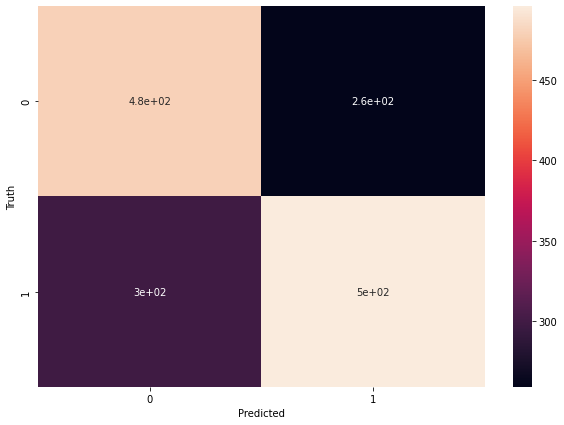

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm_bootstrap, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

From the confusion matrix heatmap above we can observe that the true postive to false negative 496:298 which is much improved than the original confusion matrix where the ratio was 1:108. Sensitivity (SN) is calculated as the number of correct positive predictions divided by the total number of positives. And here our model sensitivity has increased dramatically than before after applying bootstrap with the cost of accuracy.

## **From Assignment 01**

We are recreating the training data with selected features from assignment 01 which is required  training the linear regression model. The predictor dataframes are for high priced diamonds and low priced diamonds. The datasframes were found after extensive EDA in assignment 01. The predictor variables here are Carat, Colour2C, ClarityIS, Cut2C, Cert2G and Polish2C.

In [ ]:
import pandas as pd
df1 = pd.read_excel ('MBA6636_SM21_Professor_Proposes_Data.xlsx')
print (df1)

     Carat Colour Clarity Cut Certification Polish Symmetry  Price  Wholesaler
0     0.92      I     SI2   G           AGS      V        V   3000           1
1     0.92      I     SI2   V           AGS      G        G   3000           1
2     0.82      F     SI2   I           GIA      X        X   3004           1
3     0.81      G     SI1   I           GIA      X        V   3004           1
4     0.90      J     VS2   V           GIA      V        V   3006           1
..     ...    ...     ...  ..           ...    ...      ...    ...         ...
435   0.30      K    VVS1   V           GIA      X        V    547           3
436   0.30      H     SI1   G           GIA      V        V    559           3
437   0.30      H     SI1   X           GIA      V        V    559           3
438   0.30      H     SI1   V           GIA      X        X    559           3
439   0.30      H     SI1   X           GIA      V        X    559           3

[440 rows x 9 columns]


In [ ]:
df1["Clarity"].replace({"I1": "1", "I2": "2", "SI1": "3", "SI2": "4", "SI3": "5", "VS1": "6", "VS2": "7", "VVS1": "8", "VVS2": "9"}, inplace=True)
df1

,Carat,Colour,Clarity,Cut,Certification,Polish,Symmetry,Price,Wholesaler
0,0.92,I,4,G,AGS,V,V,3000,1
1,0.92,I,4,V,AGS,G,G,3000,1
2,0.82,F,4,I,GIA,X,X,3004,1
3,0.81,G,3,I,GIA,X,V,3004,1
4,0.90,J,7,V,GIA,V,V,3006,1
...,...,...,...,...,...,...,...,...,...
435,0.30,K,8,V,GIA,X,V,547,3
436,0.30,H,3,G,GIA,V,V,559,3
437,0.30,H,3,X,GIA,V,V,559,3
438,0.30,H,3,V,GIA,X,X,559,3


In [ ]:
df1["Colour"].replace({"D": "2", "E": "2", "F": "2", "G": "2", "H": "2", "I": "2", "J": "1", "K": "1", "L": "1"}, inplace=True)
df1

,Carat,Colour,Clarity,Cut,Certification,Polish,Symmetry,Price,Wholesaler
0,0.92,2,4,G,AGS,V,V,3000,1
1,0.92,2,4,V,AGS,G,G,3000,1
2,0.82,2,4,I,GIA,X,X,3004,1
3,0.81,2,3,I,GIA,X,V,3004,1
4,0.90,1,7,V,GIA,V,V,3006,1
...,...,...,...,...,...,...,...,...,...
435,0.30,1,8,V,GIA,X,V,547,3
436,0.30,2,3,G,GIA,V,V,559,3
437,0.30,2,3,X,GIA,V,V,559,3
438,0.30,2,3,V,GIA,X,X,559,3


In [ ]:
df1["Certification"].replace({"AGS": "2", "GIA": "2", "IGI": "1", "EGL": "1","DOW": "1" }, inplace=True)
df1

,Carat,Colour,Clarity,Cut,Certification,Polish,Symmetry,Price,Wholesaler
0,0.92,2,4,1,2,2,V,3000,1
1,0.92,2,4,2,2,1,G,3000,1
2,0.82,2,4,2,2,2,X,3004,1
3,0.81,2,3,2,2,2,V,3004,1
4,0.90,1,7,2,2,2,V,3006,1
...,...,...,...,...,...,...,...,...,...
435,0.30,1,8,2,2,2,V,547,3
436,0.30,2,3,1,2,2,V,559,3
437,0.30,2,3,2,2,2,V,559,3
438,0.30,2,3,2,2,2,X,559,3


In [ ]:
df1["Cut"].replace({"F": "1", "G": "1", "V": "2", "X": "2", "I": "2"}, inplace=True)
df1

,Carat,Colour,Clarity,Cut,Certification,Polish,Symmetry,Price,Wholesaler
0,0.92,2,4,1,2,2,V,3000,1
1,0.92,2,4,2,2,1,G,3000,1
2,0.82,2,4,2,2,2,X,3004,1
3,0.81,2,3,2,2,2,V,3004,1
4,0.90,1,7,2,2,2,V,3006,1
...,...,...,...,...,...,...,...,...,...
435,0.30,1,8,2,2,2,V,547,3
436,0.30,2,3,1,2,2,V,559,3
437,0.30,2,3,2,2,2,V,559,3
438,0.30,2,3,2,2,2,X,559,3


In [ ]:
df1["Polish"].replace({"F": "1", "G": "1", "V": "2", "X": "2", "I": "2", "v": "2"}, inplace=True)
df1

,Carat,Colour,Clarity,Cut,Certification,Polish,Symmetry,Price,Wholesaler
0,0.92,2,4,1,2,2,V,3000,1
1,0.92,2,4,2,2,1,G,3000,1
2,0.82,2,4,2,2,2,X,3004,1
3,0.81,2,3,2,2,2,V,3004,1
4,0.90,1,7,2,2,2,V,3006,1
...,...,...,...,...,...,...,...,...,...
435,0.30,1,8,2,2,2,V,547,3
436,0.30,2,3,1,2,2,V,559,3
437,0.30,2,3,2,2,2,V,559,3
438,0.30,2,3,2,2,2,X,559,3


In [ ]:
df_as1=df1.drop(columns=['Symmetry'])
df_as1

,Carat,Colour,Clarity,Cut,Certification,Polish,Price,Wholesaler
0,0.92,2,4,1,2,2,3000,1
1,0.92,2,4,2,2,1,3000,1
2,0.82,2,4,2,2,2,3004,1
3,0.81,2,3,2,2,2,3004,1
4,0.90,1,7,2,2,2,3006,1
...,...,...,...,...,...,...,...,...
435,0.30,1,8,2,2,2,547,3
436,0.30,2,3,1,2,2,559,3
437,0.30,2,3,2,2,2,559,3
438,0.30,2,3,2,2,2,559,3


In [ ]:
df_highprice = df_as1[df_as1['Wholesaler'] < 3]
print (df_highprice)

df_lowprice = df_as1[df_as1['Wholesaler'] > 2]
print (df_lowprice)
df_highprice1=df_highprice.drop(columns=['Wholesaler'])
df_lowprice1=df_lowprice.drop(columns=['Wholesaler'])
print (df_highprice1)
print (df_lowprice1)

     Carat Colour Clarity Cut Certification Polish  Price  Wholesaler
0     0.92      2       4   1             2      2   3000           1
1     0.92      2       4   2             2      1   3000           1
2     0.82      2       4   2             2      2   3004           1
3     0.81      2       3   2             2      2   3004           1
4     0.90      1       7   2             2      2   3006           1
..     ...    ...     ...  ..           ...    ...    ...         ...
235   1.10      2       1   2             1      1   2772           2
236   1.16      2       1   2             2      1   2775           2
237   1.00      2       1   2             2      2   2779           2
238   1.00      1       3   1             1      2   2780           2
239   1.00      1       3   1             1      1   2780           2

[240 rows x 8 columns]
     Carat Colour Clarity Cut Certification Polish  Price  Wholesaler
240   0.09      2       3   2             1      1    190         

In [ ]:
df_highprice2 = df_highprice1.rename(columns={'Colour': 'Colour2C', 'Cut': 'Cut2C', 'Certification': 'Cert2G', 'Clarity': 'ClarityIS', 'Polish': 'Polish2C'})
df_highprice2

,Carat,Colour2C,ClarityIS,Cut2C,Cert2G,Polish2C,Price
0,0.92,2,4,1,2,2,3000
1,0.92,2,4,2,2,1,3000
2,0.82,2,4,2,2,2,3004
3,0.81,2,3,2,2,2,3004
4,0.90,1,7,2,2,2,3006
...,...,...,...,...,...,...,...
235,1.10,2,1,2,1,1,2772
236,1.16,2,1,2,2,1,2775
237,1.00,2,1,2,2,2,2779
238,1.00,1,3,1,1,2,2780


In [ ]:
df_lowprice2 = df_lowprice1.rename(columns={'Colour': 'Colour2C', 'Cut': 'Cut2C', 'Certification': 'Cert2G', 'Clarity': 'ClarityIS', 'Polish': 'Polish2C'})
df_lowprice2

,Carat,Colour2C,ClarityIS,Cut2C,Cert2G,Polish2C,Price
240,0.09,2,3,2,1,1,190
241,0.09,2,3,2,1,1,160
242,0.09,2,3,2,1,2,160
243,0.09,2,3,2,1,1,180
244,0.09,2,6,2,1,2,190
...,...,...,...,...,...,...,...
435,0.30,1,8,2,2,2,547
436,0.30,2,3,1,2,2,559
437,0.30,2,3,2,2,2,559
438,0.30,2,3,2,2,2,559


## **Cross Validation on the dataframe**

Here, I am importing the two predictor dataframes which has the predictor variables and response variable as well. The predictor datasets are for high priced diamonds and low priced diamonds. The datasets were found after extensive EDA in assignment 01. The predictor variables here are Carat, Colour2C, ClarityIS, Cut2C, Cert2G and Polish2C.

# **Creating the traning data for high priced diamonds**

In [ ]:
X=df_highprice2.drop(columns=['Price'])
X=X.drop(columns=['Cert2G'])
X=X.drop(columns=['Polish2C'])
X
print(X)

     Carat Colour2C ClarityIS Cut2C
0     0.92        2         4     1
1     0.92        2         4     2
2     0.82        2         4     2
3     0.81        2         3     2
4     0.90        1         7     2
..     ...      ...       ...   ...
235   1.10        2         1     2
236   1.16        2         1     2
237   1.00        2         1     2
238   1.00        1         3     1
239   1.00        1         3     1

[240 rows x 4 columns]


In [ ]:
y = df_highprice2.Price
y

0      3000
1      3000
2      3004
3      3004
4      3006
       ... 
235    2772
236    2775
237    2779
238    2780
239    2780
Name: Price, Length: 240, dtype: int64

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

**Creating our testing data from Professor's diamond ring requirements**

In [ ]:
import pandas as pd
  
# Creating our testing data from Professor's diamond ring requirements
X_test = {'Carat':[0.9], 'Colour2C':['J'], 'ClarityIS':['S12'], 'Cut2C':['Very Good']}
X_test

{'Carat': [0.9],
 'ClarityIS': ['S12'],
 'Colour2C': ['J'],
 'Cut2C': ['Very Good']}

In [ ]:
# Creating our testing data frame by putting relevant dummy variables
X_test = {'Carat':[0.9], 'Colour2C':[1], 'ClarityIS':[4], 'Cut2C':[2]}

X_test=pd.DataFrame.from_dict(X_test)
X_test


,Carat,Colour2C,ClarityIS,Cut2C
0,0.9,1,4,2


In [ ]:
import sklearn.model_selection
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X,y1,train_size=0.8)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X, y)


LinearRegression()

In [ ]:
model.predict(X_test)

array([2832.8722859])

# **cross_val_score function**

Scikit-learn's cross_val_score() method requires four parameters. First, we have the estimator or the specific model that we want to use, here, I used linear regression. Next, we use X to specify the complete training dataset and y to specify the response values. Lastly, the parameter cv allows us to specify the number of cross-validation splits (or folds). Here, I applied 5-fold, 3-fold and 10-fold cross-validation. By default, cross_val_score() will use a default scoring function for whichever model have been specified. For most regression models, it will return the R-squared value.

In [ ]:
from sklearn.model_selection import cross_val_score
# Load the mean squared error method
# Load the function for creating a scorer
from sklearn.metrics import mean_squared_error, make_scorer

Running 5-fold CV on training data 

In [ ]:
scores = cross_val_score(model, X, y, cv=5, scoring=make_scorer(mean_squared_error))
scores
print(scores.mean())

138011.65540115273


Running 3-fold CV on training data 

In [ ]:
scores = cross_val_score(model, X, y, cv=3, scoring=make_scorer(mean_squared_error))
scores
print(scores.mean())

119821.59211327613


Running 10-fold CV on training data 

In [ ]:
scores = cross_val_score(model, X, y, cv=10, scoring=make_scorer(mean_squared_error))
scores
print(scores.mean())

126767.27383924715


# **Bootstrap method for high priced diamond dataframe**

In [ ]:
X_new = X.astype(float)
X_new.dtypes
y_new = y.astype(float)
y_new.dtypes

dtype('float64')

**Preparing bootstrap sample 3 times the size**

Here we are sampling our original dataframe 3 times with random probability distribution

In [ ]:

import numpy as np
from imblearn import FunctionSampler
X_hetero=X_new.to_numpy()

y_hetero=y_new.to_numpy()

rng = np.random.RandomState(33)

number_of_samples=3

def dummy_sampler(Z, w):
    indices = rng.choice(np.arange(Z.shape[0]), size=(number_of_samples*len(X_hetero)))
    return Z[indices], w[indices]
sampler = FunctionSampler(func=dummy_sampler, validate=False)
X_res, y_res = sampler.fit_resample(X_hetero, y_hetero)
y_train_bs = pd.DataFrame(y_res, columns = ['Price'])
print(y_train_bs)
X_train_bs = pd.DataFrame(X_res, columns = ['Carat', 'Colour2C', 'ClarityIS', 'Cut2C'])
print(X_train_bs)
# print(X)
# print(y)

      Price
0    3031.0
1    3102.0
2    2682.0
3    1988.0
4    3112.0
..      ...
715  3012.0
716  2601.0
717  3004.0
718  1988.0
719  3130.0

[720 rows x 1 columns]
     Carat  Colour2C  ClarityIS  Cut2C
0     0.81       2.0        4.0    2.0
1     1.01       2.0        4.0    1.0
2     1.00       1.0        4.0    2.0
3     1.23       2.0        2.0    1.0
4     1.14       2.0        1.0    1.0
..     ...       ...        ...    ...
715   0.80       2.0        4.0    2.0
716   1.02       2.0        1.0    1.0
717   0.82       2.0        4.0    2.0
718   1.23       2.0        2.0    1.0
719   1.02       2.0        5.0    2.0

[720 rows x 4 columns]


In [ ]:
import sklearn.model_selection

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train_bs, y_train_bs)

LinearRegression()

In [ ]:
model.predict(X_test)

array([[2874.73374529]])

**Preparing bootstrap sample 10 times the size**

In [ ]:
number_of_samples=10

def dummy_sampler(Z, w):
    indices = rng.choice(np.arange(Z.shape[0]), size=(number_of_samples*len(X_hetero)))
    return Z[indices], w[indices]
sampler = FunctionSampler(func=dummy_sampler, validate=False)
X_res, y_res = sampler.fit_resample(X_hetero, y_hetero)
y_train_bs1 = pd.DataFrame(y_res, columns = ['Price'])
len(y_train_bs1)
X_train_bs1 = pd.DataFrame(X_res, columns = ['Carat', 'Colour2C', 'ClarityIS', 'Cut2C'])
len(X_train_bs1)

2400

In [ ]:
model = LinearRegression()
model.fit(X_train_bs1, y_train_bs1)
model.predict(X_test)


array([[2815.94944113]])